In [1]:
import cv2
import  matplotlib.pyplot as plt

THIS CODE SNIPPET EXECUTED IN TERMINAL IS USED TO SPLIT THE EXISTING DATASET INTO TEST,VALIDATION AND TRAINING SUBFOLDERS
import splitfolders
splitfolders.ratio('PokemonData', output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

In [2]:
snorlax=cv2.imread(r'C:\Users\Dell\POKEMON\train\Snorlax\45aacf9ba65543e08c2a9959c7a31b76.jpg')

In [3]:
snorlax=cv2.cvtColor(snorlax,cv2.COLOR_BGR2RGB)
#plt.imshow(snorlax)

In [4]:
from keras.preprocessing.image import ImageDataGenerator
image_gen=ImageDataGenerator(rotation_range=45,width_shift_range=0.1,height_shift_range=0.1,rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [5]:
image_gen.flow_from_directory(r'C:\Users\Dell\POKEMON\train')
input_shape=(280,280,3)

Found 5391 images belonging to 150 classes.


In [6]:
# Assuming your dataset structure is like:
# - dataset_folder
#   - class1
#     - image1.jpg
#     - image2.jpg
#   - class2
#     - image3.jpg
#     - image4.jpg
import os
dataset_folder = r'C:\Users\Dell\POKEMON\train'

# Extract labels from folder names
labels = [label for label in os.listdir(dataset_folder) if os.path.isdir(os.path.join(dataset_folder, label))]
print(labels)
# Display the unique labels
unique_labels = set(labels)
#print("Unique Labels:", unique_labels)


['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Ni

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,Activation
model=Sequential()
#1st
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(280,280,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#2nd
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(280,280,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#3rd
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(280,280,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flattening the previous layers to give 2D->1D
model.add(Flatten())
#Dense Layer and Activation 
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu')) 
#Dense Layer and Activation 
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu')) 
#Dropout
model.add(Dropout(0.6))
#Dense Layer and Activation 
model.add(Dense(150))
model.add(Activation('softmax')) 

#Compile and give loss func,optimizer and metrics
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 278, 278, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 139, 139, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 137, 137, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 68, 68, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 66, 66, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 33, 33, 64)        0

In [8]:
batch_size=32
train_image_gen=image_gen.flow_from_directory(r"C:\Users\Dell\POKEMON\train",target_size=input_shape[:2],batch_size=batch_size,class_mode='categorical')
validation_image_gen=image_gen.flow_from_directory(r"C:\Users\Dell\POKEMON\val",target_size=input_shape[:2],batch_size=batch_size,class_mode='categorical')

Found 5391 images belonging to 150 classes.
Found 615 images belonging to 150 classes.


In [9]:

from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
result=model.fit_generator(train_image_gen,epochs=55,steps_per_epoch=169,
                          validation_data=validation_image_gen,validation_steps=20)



C:\Users\Dell\AppData\Local\Temp\ipykernel_20184\2807781156.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result=model.fit_generator(train_image_gen,epochs=55,steps_per_epoch=169,


KeyboardInterrupt: 

c:\Users\Dell\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


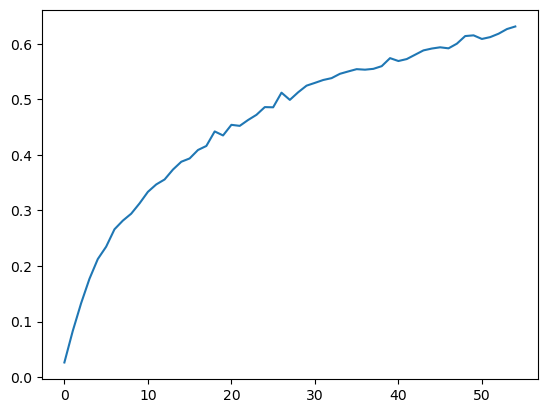

In [ ]:
model.save('pokemon.h5')
plt.plot(result.history['accuracy'])

In [ ]:
model.fit(train_image_gen,epochs=25,steps_per_epoch=169,
                          validation_data=validation_image_gen,validation_steps=20)


Epoch 1/25
169/169 [==============================] - 349s 2s/step - loss: 1.3502 - accuracy: 0.6197 - val_loss: 1.7603 - val_accuracy: 0.5642
Epoch 2/25
169/169 [==============================] - 347s 2s/step - loss: 1.2691 - accuracy: 0.6446 - val_loss: 1.8174 - val_accuracy: 0.5642
Epoch 3/25
169/169 [==============================] - 363s 2s/step - loss: 1.2973 - accuracy: 0.6322 - val_loss: 1.7659 - val_accuracy: 0.5789
Epoch 4/25
169/169 [==============================] - 352s 2s/step - loss: 1.2778 - accuracy: 0.6398 - val_loss: 1.8227 - val_accuracy: 0.5707
Epoch 5/25
169/169 [==============================] - 353s 2s/step - loss: 1.2582 - accuracy: 0.6502 - val_loss: 1.6819 - val_accuracy: 0.5854
Epoch 6/25
169/169 [==============================] - 350s 2s/step - loss: 1.2685 - accuracy: 0.6420 - val_loss: 1.8405 - val_accuracy: 0.5756
Epoch 7/25
169/169 [==============================] - 350s 2s/step - loss: 1.2274 - accuracy: 0.6600 - val_loss: 1.8144 - val_accuracy: 0.5789

c:\Users\Dell\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


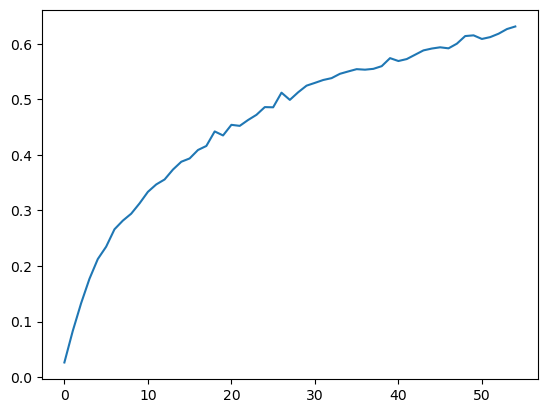

In [ ]:
model.save('pokemon.h5')
plt.plot(result.history['accuracy'])